[Reference]
https://github.com/gustavovelascoh/octane-NIR
* octane.xlsx - octane NIR dataset provided by CAMO Software.
* gasoline.csv - gasoline NIR dataset exported from pls R package

In [31]:
import numpy as np
import pandas as pd

def import_dataset(ds_name='octane'):
    """
    ds_name: Name of the dataset ('octane', 'gasoline')
    Returns:
    wls: Numpy ndarray: List of wavelength
    xdata: Pandas DataFrame: Measurements
    ydata: Pandas Series: Octane numbers
    """

    if ds_name == 'octane':
        oct_df = pd.read_excel('octane.xlsx')
        wls = np.array([int(i) for i in oct_df.columns.values[2:]])
        xdata = oct_df.loc[:, '1100':]
        ydata = oct_df['Octane number']
    elif ds_name == 'gasoline':
        import re

        gas_df = pd.read_csv('gasoline.csv')
        reg = re.compile('([0-9]+)')
        wls = np.array([int(reg.findall(i)[0]) for i in gas_df.columns.values[1:]])
        xdata = gas_df.loc[:, 'NIR.900 nm':]
        ydata = gas_df['octane']
    else:
        exit('Invalid Dataset')

    return wls, xdata, ydata

In [9]:
dataset = 'gasoline'
#dataset = 'octane'
wls, xdata, ydata = import_dataset(dataset)

In [33]:
print(len(wls))
wls

401


array([ 900,  902,  904,  906,  908,  910,  912,  914,  916,  918,  920,
        922,  924,  926,  928,  930,  932,  934,  936,  938,  940,  942,
        944,  946,  948,  950,  952,  954,  956,  958,  960,  962,  964,
        966,  968,  970,  972,  974,  976,  978,  980,  982,  984,  986,
        988,  990,  992,  994,  996,  998, 1000, 1002, 1004, 1006, 1008,
       1010, 1012, 1014, 1016, 1018, 1020, 1022, 1024, 1026, 1028, 1030,
       1032, 1034, 1036, 1038, 1040, 1042, 1044, 1046, 1048, 1050, 1052,
       1054, 1056, 1058, 1060, 1062, 1064, 1066, 1068, 1070, 1072, 1074,
       1076, 1078, 1080, 1082, 1084, 1086, 1088, 1090, 1092, 1094, 1096,
       1098, 1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118,
       1120, 1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140,
       1142, 1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162,
       1164, 1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184,
       1186, 1188, 1190, 1192, 1194, 1196, 1198, 12

In [34]:
print(xdata.shape)
xdata.head()

(60, 401)


,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,NIR.918 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
1,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,-0.036012,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
2,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,-0.032740,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
3,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,-0.033920,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
4,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,-0.034012,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
5,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,-0.040752,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926


In [37]:
print(ydata.shape)
ydata.head()

(60,)


1    85.30
2    85.25
3    88.45
4    83.40
5    87.90
Name: octane, dtype: float64

# Plot dataset (raw)

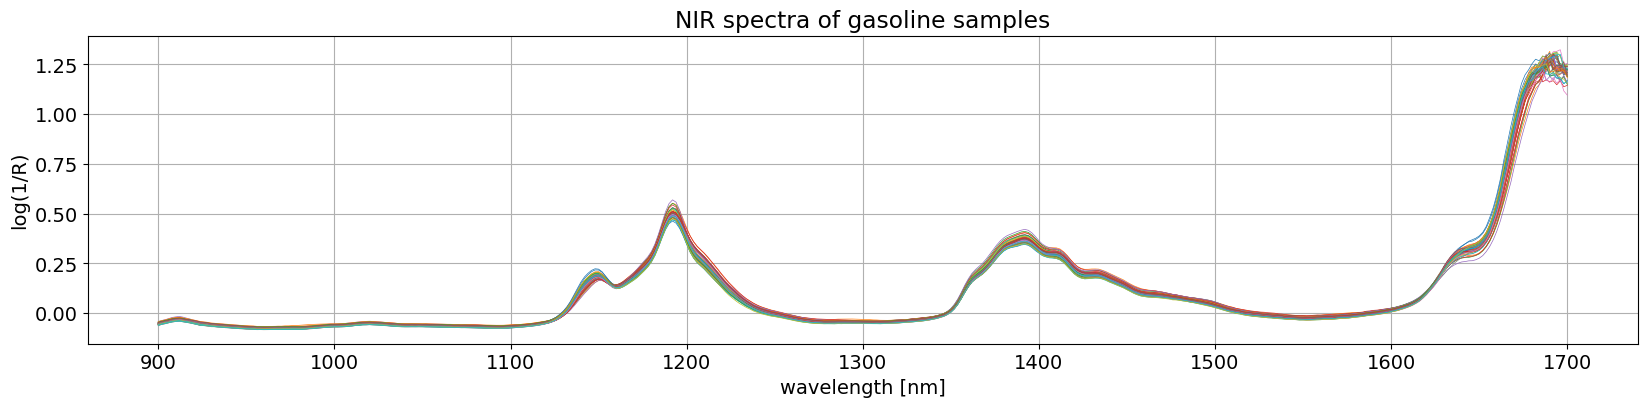

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(wls, xdata.values.T, linewidth=0.5)
ax.set_title('NIR spectra of gasoline samples')
ax.set_xlabel('wavelength [nm]')
ax.set_ylabel('log(1/R)')

plt.grid()
plt.savefig('octane_001.png')
plt.show()